In [12]:
import pyfeyn2
# from pyfeyn2.user import *
from pyfeyn2.render import *

In [17]:
processOptions()
fd = FeynDiagram()

in1 = Point(-4,  2)
in2 = Point(-4, -2)
out1 = Point(4, -2)
out2 = Point(4,  2)
in_vtx = Vertex(-2, 0, mark=CIRCLE)
out_vtx = Vertex(2, 0, mark=CIRCLE)

l1 = Label("Drell-Yan QCD vertex correction", x=0, y=2)

fa1 = Fermion(in1, in_vtx).addArrow().addLabel(r"\Pelectron")
fa2 = Fermion(in_vtx, in2).addArrow().addLabel(r"\Ppositron")
fa2.addParallelArrow(size=0.1, displace=-0.06, sense=-1)
bos = Photon(in_vtx, out_vtx).addLabel(r"\Pphoton/\PZ")
fb1 = Fermion(out1, out_vtx).addArrow(0.2).addLabel(r"\APquark")
fb1.addParallelArrow(size=0.1, displace=-0.06, sense=-1)
fb2 = Fermion(out_vtx, out2).addArrow(0.8).addLabel(r"\Pquark")
glu = Gluon(midpoint(out_vtx, out1), midpoint(out_vtx, out2)).set3D()
glu.invert().bend(0.5).addLabel("\Pgluon", displace=0.35)
glu.addParallelArrow(size=0.1, displace=0.2, sense=-1)

fd.draw("pyfeyn-test1.pdf")

NameError: name 'processOptions' is not defined

In [1]:
from pyfeyn2.feynmandiagram import FeynmanDiagram, Leg, Propagator, Vertex
from pyfeyn2.render.all import AllRender
from pyfeyn2.auto.position import feynman_adjust_points

ImportError: cannot import name 'ForwardRef' from 'typing_extensions' (/home/jykim/.local/lib/python3.10/site-packages/typing_extensions.py)

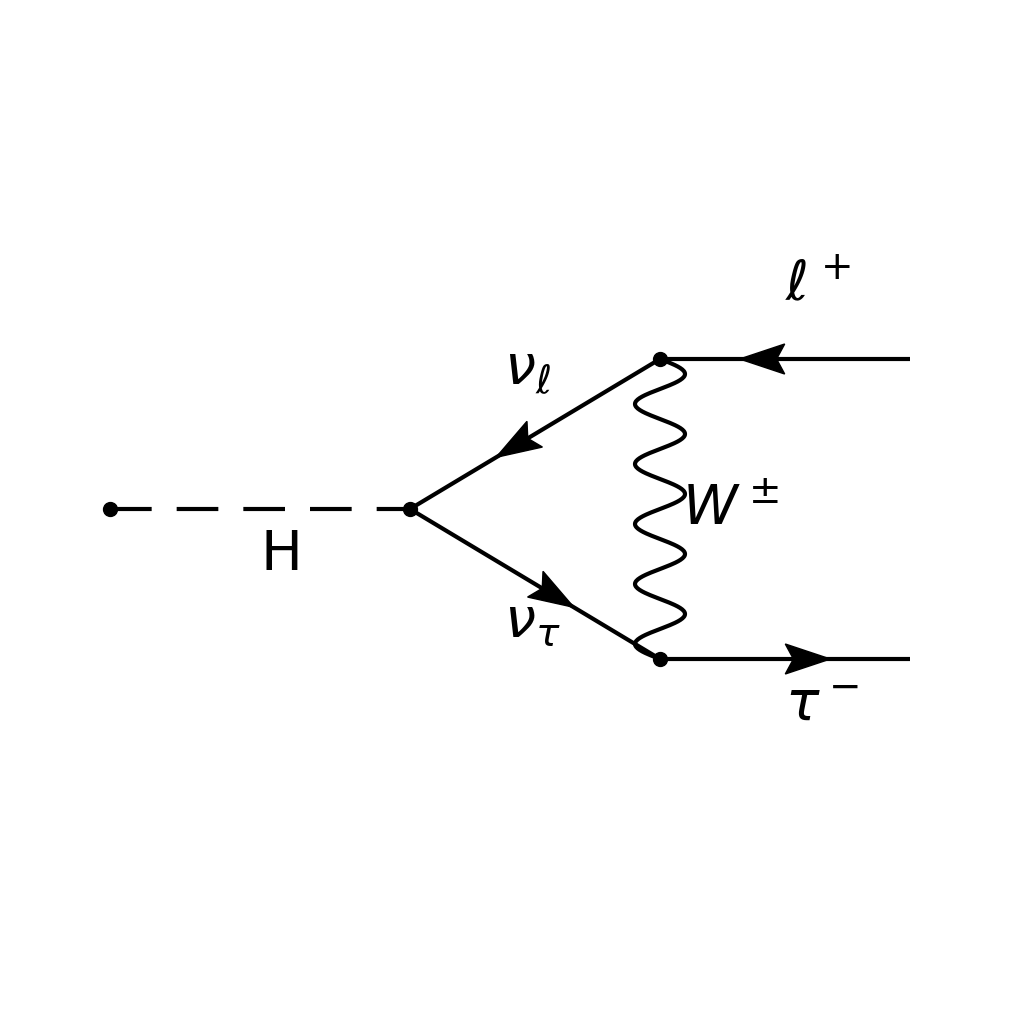

In [2]:
import matplotlib.pyplot as plt
from feynman import Diagram

fig = plt.figure(figsize=(10.,10.))
ax = fig.add_axes([0,0,1,1], frameon=False)

diagram = Diagram(ax)
in1 = diagram.vertex(xy=(.1,.5))
in2= diagram.vertex(xy=(.4,.5))
v1 = diagram.vertex(xy=(.65,.65))
v2 = diagram.vertex(xy=(.65,.35))
out1 = diagram.vertex(xy=(.9,.65),marker='')
out2 = diagram.vertex(xy=(.9,.35),marker='')

higgs = diagram.line(in1, in2, arrow=False, style='dashed')
nu1 = diagram.line(v1, in2)
nu2 = diagram.line(in2, v2)
w = diagram.line(v1, v2, style='wiggly')
lep = diagram.line(out1, v1)
tau = diagram.line(v2, out2)

nu1.text(r"$\nu_\ell$",fontsize=40)
nu2.text(r"$\nu_\tau$",fontsize=40)
lep.text(r"$\ell^+$",fontsize=40)
tau.text(r"$\tau^-$",fontsize=40)
diagram.text(0.72,0.5,"$W^\pm$",fontsize=40)
higgs.text("H",fontsize=40)

diagram.plot()
plt.show()

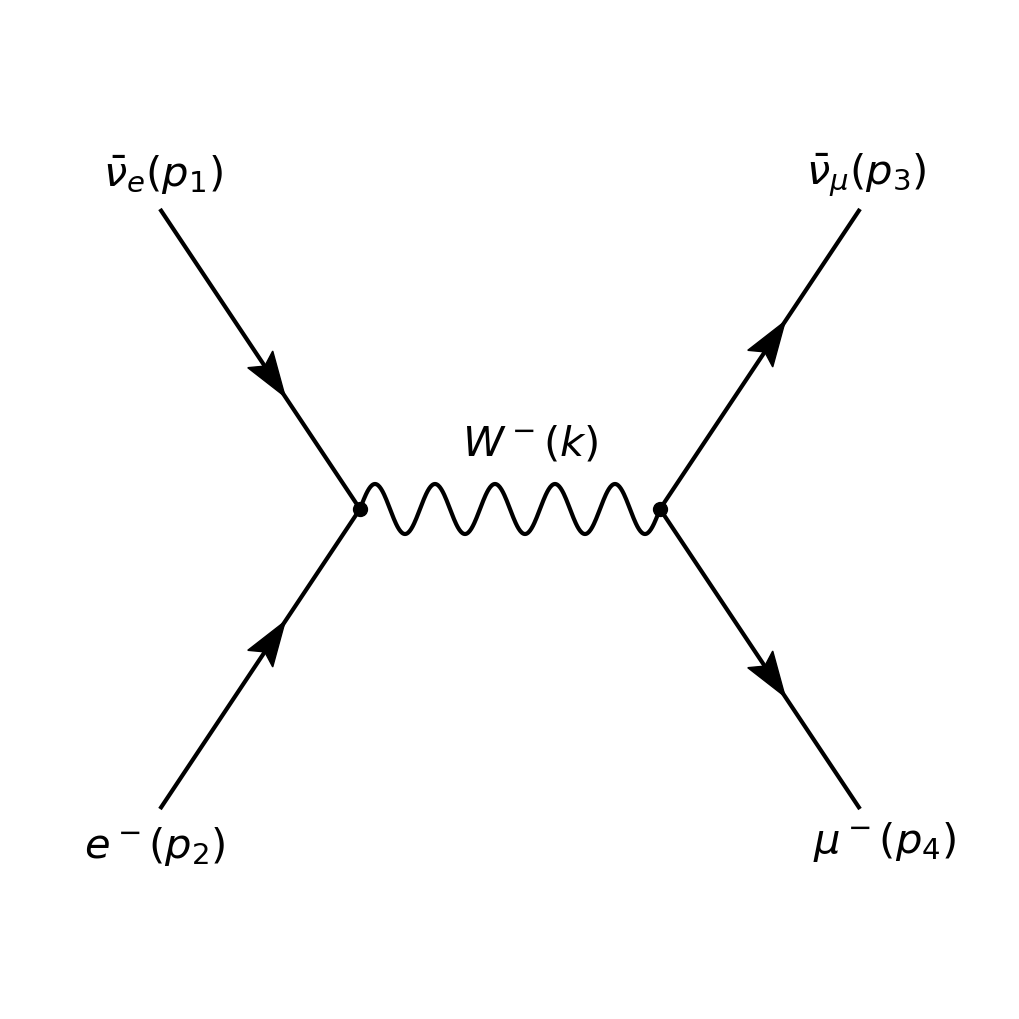

$\bar{\nu}_e (p_1)$       0.003  0.035
$e^- (p_2)$              -0.005 -0.037
$\bar{\nu}_\mu (p_3)$     0.006  0.035
$\mu^- (p_4)$             0.024 -0.032
$W^- (k)$                 0.340  0.054


In [3]:
"""
Glashow resonance
=================

Example of drag and droppable labels.
"""
import matplotlib.pyplot as plt
from feynman import Diagram

fig = plt.figure(figsize=(10.,10.))
ax = fig.add_axes([0,0,1,1], frameon=False)

diagram = Diagram(ax, draggable=True)
i1 = diagram.vertex(xy=(.15, .8), marker="")
i2 = diagram.vertex(xy=(.15, .2), marker="")
v1 = diagram.vertex(xy=(.35, .5))
v2 = diagram.vertex(xy=(.65, .5))
o1 = diagram.vertex(xy=(.85, .8), marker="")
o2 = diagram.vertex(xy=(.85, .2), marker="")

f1 = diagram.line(i1, v1, arrow = True)
f2 = diagram.line(i2, v1, arrow = True)
w1 = diagram.line(v1, v2, style = "wiggly")
f3 = diagram.line(v2, o1, arrow = True)
f4 = diagram.line(v2, o2, arrow = True)

opts = {"fontsize": 30}
i1.text(r"$\bar{\nu}_e (p_1)$",    .003,  .035, **opts)
i2.text(r"$e^- (p_2)$",           -.005, -.037, **opts)
o1.text(r"$\bar{\nu}_\mu (p_3)$",  .006,  .035, **opts)
o2.text(r"$\mu^- (p_4)$",          .024, -.032, **opts)
w1.text(r"$W^- (k)$",              .340,  .054, **opts)

diagram.plot()
plt.show()

# If text element have been dragged, then their relative coordinates are
# updated accordingly. Let us print those.
for drawable in (i1, i2, o1, o2, w1):
    s, x, y, _ = drawable.texts[0]
    print("{:24s} {:6.3f} {:6.3f}".format(s, x, y))
    

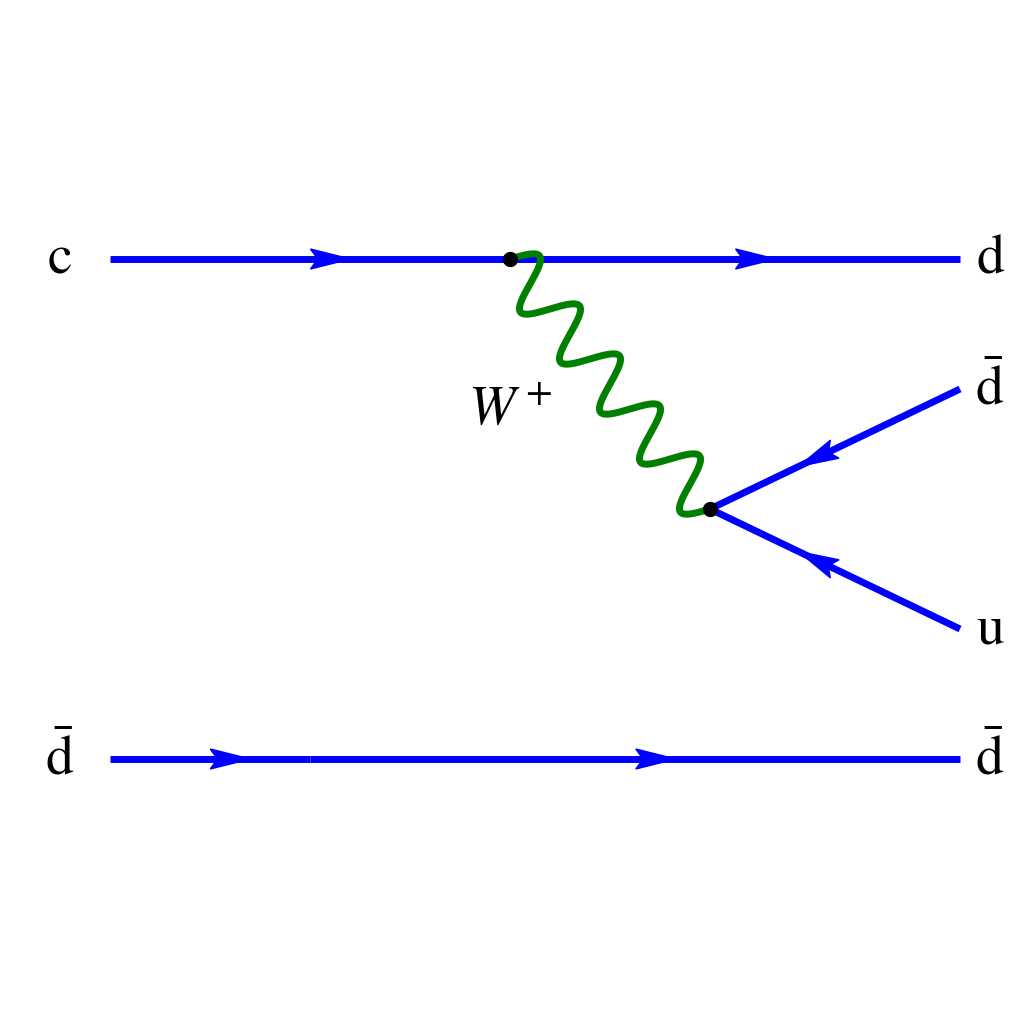

In [36]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

from feynman import Diagram

fig = matplotlib.pyplot.figure(figsize=(10.,10.))
ax = fig.add_axes([0,0,1,1], frameon=False)

diagram = Diagram(ax)
# diagram.text(.4,0.9,"Doubly Charged Higgs Production", fontsize=40)
q1in = diagram.vertex(xy=(.1,.75), marker='')
q2in= diagram.vertex(xy=(.1,.25), marker='')
v1 = diagram.vertex(xy=(.5,.75))
# v2 = diagram.vertex(xy=(.3,.25))
vmerge = diagram.vertex(xy=(.7,.5))
# higgsout = diagram.vertex(xy=(.8,.5))
q1pout = diagram.vertex(xy=(.95,.75), marker='')
q2pout = diagram.vertex(xy=(.95,.25), marker='')
l1out = diagram.vertex(xy=(.95,.62), marker='')
l2out = diagram.vertex(xy=(.95,.38), marker='')

lw = 5
# Quarks
q1 = diagram.line(q1in, v1, color='blue', lw=lw, arrow_param=dict(color='blue', length=0.08, width=0.02))
q2 = diagram.line(q2in, v2, color='blue', lw=lw, arrow_param=dict(color='blue', length=0.08, width=0.02))
q1p = diagram.line(v1, q1pout, color='blue', lw=lw, arrow_param=dict(color='blue', length=0.08, width=0.02))
q2p = diagram.line(v2, q2pout, color='blue', lw=lw, arrow_param=dict(color='blue', length=0.08, width=0.02))
diagram.text(.05, 0.75, "c", fontsize=40)
diagram.text(.05, 0.25, r"$\mathrm{\bar{d}}$",fontsize=40)
diagram.text(0.98, 0.75, r"d", fontsize=40)
diagram.text(0.98, 0.25, r"$\mathrm{\bar{d}}$",fontsize=40)

# Bosons
w1 = diagram.line(v1, vmerge, style='wiggly', color='green', lw=lw)
# w2 = diagram.line(v2, vmerge, style='wiggly', color='green', lw=lw)
# higgs = diagram.line(vmerge, higgsout, arrow=False, ls='dashed', lw=lw, dashes=(4, 2))
diagram.text(0.50, 0.6, r"$W^+$", fontsize=40)
# diagram.text(0.35, 0.38, r"$W^+$", fontsize=40)
# diagram.text(0.72, 0.55, r"$H^{++}$", fontsize=40)

# Leptons
l1 = diagram.line(l1out, vmerge, color='blue', lw=lw, arrow_param=dict(color='blue', length=0.08, width=0.02))
l2 = diagram.line(l2out, vmerge, color='blue', lw=lw, arrow_param=dict(color='blue', length=0.08, width=0.02))
diagram.text(0.98, 0.62, r"$\mathrm{\bar{d}}$", fontsize=40)
diagram.text(0.98, 0.38, r"$\mathrm{u}$", fontsize=40)


diagram.plot()
matplotlib.pyplot.show()

diagram.savefig('test.png')

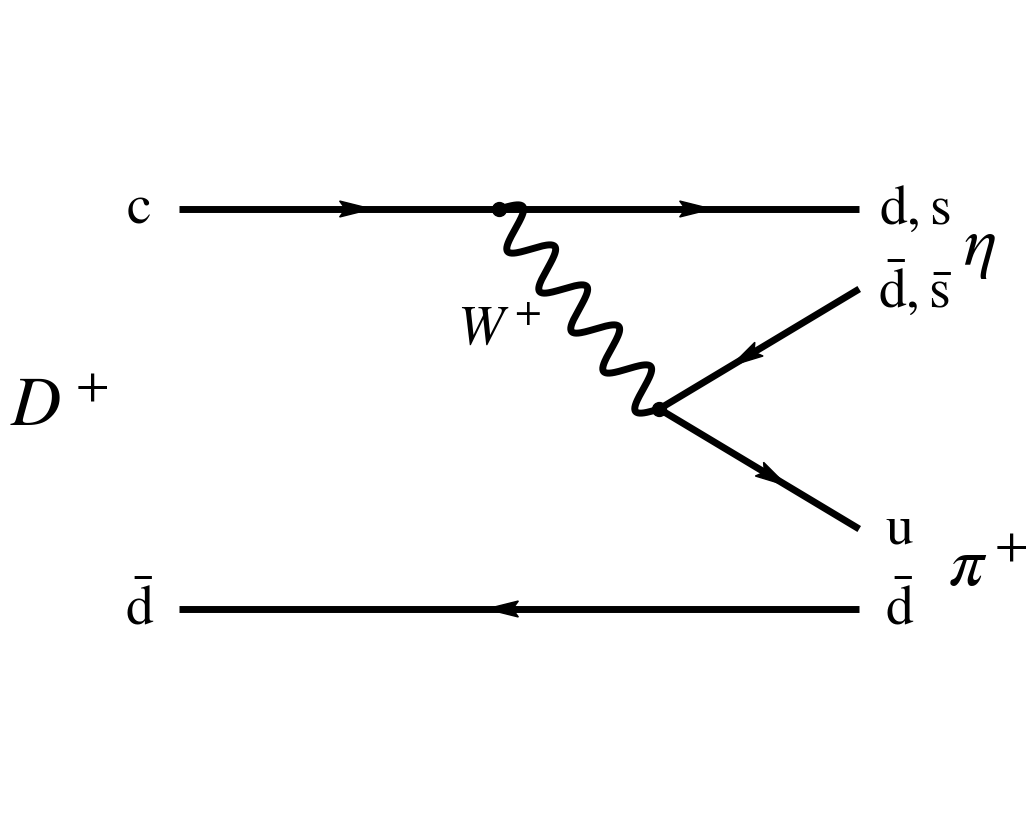

In [116]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

from feynman import Diagram

fig = matplotlib.pyplot.figure(figsize=(8.,8.))
ax = fig.add_axes([0,0,1,1], frameon=False)

diagram = Diagram(ax)
# diagram.text(.4,0.9,"Doubly Charged Higgs Production", fontsize=40)
q1in = diagram.vertex(xy=(.1,.75), marker='')
q2in= diagram.vertex(xy=(.1,.25), marker='')
v1 = diagram.vertex(xy=(.5,.75))
# v2 = diagram.vertex(xy=(.3,.25))
vmerge = diagram.vertex(xy=(.7,.5))
# higgsout = diagram.vertex(xy=(.8,.5))
q1pout = diagram.vertex(xy=(.95,.75), marker='')
q2pout = diagram.vertex(xy=(.95,.25), marker='')
l1out = diagram.vertex(xy=(.95,.65), marker='')
l2out = diagram.vertex(xy=(.95,.35), marker='')

lw = 5
# Quarks
q1 = diagram.line(q1in, v1, color='black', lw=lw, arrow_param=dict(color='black', length=0.08, width=0.02))
q2 = diagram.line(q2pout,q2in, color='black', lw=lw, arrow_param=dict(color='black', length=0.08, width=0.02))
q1p = diagram.line(v1, q1pout, color='black', lw=lw, arrow_param=dict(color='black', length=0.08, width=0.02))
# q2p = diagram.line(v2, q2pout, color='black', lw=lw, arrow_param=dict(color='blue', length=0.08, width=0.02))
diagram.text(.05, 0.75, "c", fontsize=40)
diagram.text(.05, 0.25, r"$\mathrm{\bar{d}}$",fontsize=40)
diagram.text(1.02, 0.75, r"$\mathrm{d,s}$", fontsize=40)
diagram.text(1.0, 0.25, r"$\mathrm{\bar{d}}$",fontsize=40)

# Bosons
w1 = diagram.line(v1, vmerge, style='wiggly', color='black', lw=lw)
# w2 = diagram.line(v2, vmerge, style='wiggly', color='green', lw=lw)
# higgs = diagram.line(vmerge, higgsout, arrow=False, ls='dashed', lw=lw, dashes=(4, 2))
diagram.text(0.50, 0.6, r"$W^+$", fontsize=40)
# diagram.text(0.72, 0.55, r"$H^{++}$", fontsize=40)

# Leptons
l1 = diagram.line(l1out, vmerge, color='black', lw=lw, arrow_param=dict(color='black', length=0.08, width=0.02))
l2 = diagram.line(vmerge, l2out, color='black', lw=lw, arrow_param=dict(color='black', length=0.08, width=0.02))
diagram.text(1.02, 0.65, r"$\mathrm{\bar{d}}\mathrm{,\bar{s}}$", fontsize=40)
diagram.text(1.0, 0.35, r"$\mathrm{u}$", fontsize=40)


diagram.text(-0.05, 0.5, r"$D^+$", fontsize=50)
diagram.text(+1.1, 0.7, r"$\eta$", fontsize=50)
diagram.text(+1.11, 0.30, r"$\pi^+$", fontsize=50)


diagram.plot()
matplotlib.pyplot.show()

diagram.savefig('test.png')

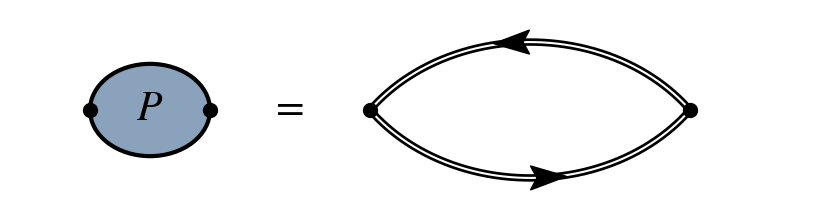

In [63]:
import matplotlib.pyplot as plt
from feynman import Diagram

# Set up the figure and ax
fig = plt.figure(figsize=(8,2))
ax = fig.add_axes([0,0,1,1], frameon=False)

# It is best to keep the xlim/ylim ratio the same as the figure aspect ratio.
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.25)

y0 = sum(ax.get_ylim()) / 2

# Initialize diagram with the ax
D = Diagram(ax)

# Polarizability operator
v11 = D.vertex([0.1, y0])
v12 = D.vertex(v11.xy, dx=0.15)
P = D.operator([v11, v12], c=1.3)  # c is the excentricity of the patch
P.text("$P$")

# Symbols
D.text(.35, y0, "=", fontsize=30)

# Propagator lines
G_style = dict(style='double elliptic',
               ellipse_excentricity=-1.2, ellipse_spread=.3,
               arrow=True, arrow_param={'width':0.03})

v21 = D.vertex([0.45, y0])
v22 = D.vertex(v21.xy, dx=0.4)

G1 = D.line(v22, v21, **G_style)
G2 = D.line(v21, v22, **G_style)

# Plot and show
D.plot()
plt.show()